# Introduction to Machine Learning

This week we will have a brief look at machine learning, both to introduce some of the key concepts behind this important topic and also to see the important role linear algebra plays in data science and applied mathematics more generally.

In this first notebook we work through a simple machine learning example to illustrate the basic steps in the machine learning. 

As we proceed through the steps below, it is not essential that you follow every aspect of every step on first reading. The goal is to first get a flavour of the steps. 

---

### Scikit-learn

We will use [scikit-learn](https://scikit-learn.org/stable/index.html) for our machine learning examples. The scikit-learn library is built on NumPy, SciPy, and matplotlib and provides
- Machine learning algorithms 
- Real and artificial datasets to explore 
- Tools for evaluating performance
- An excellent, comprehensive [Users Guide](https://scikit-learn.org/stable/user_guide.html)

---

## Example: Diabetes dataset

### Overview

The [diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) is not quite as popular as the iris dataset, but it is nevertheless one of the common examples used to illustrate machine learning. Rephrasing slightly from [here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html):

    "Ten variables -- age, sex, body mass index, average blood pressure, and six blood serum measurements -- were obtained for each of 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year later."

The idea is to learn from this data so that given the values of the 10 variables from a previously unseen patient, one can predict the *disease progression one year later* for this new patient. The variables are all real values (floats), so from 10 real values we wish to predict a single real value. 

Stated mathematically, our goal is to use the data to find a map from $\mathbb R^{10}$ to $\mathbb R$. Here we will restrict to linear maps. In the notation from linear algebra, our goal is thus to obtain a linear map $T: \mathbb R^{10} \to \mathbb R$. Using a computer to find such a map from the data is machine learning. 

---

The linear map considered here is nothing other than a [linear least squares](https://en.wikipedia.org/wiki/Linear_least_squares) approximation. You may be familiar with this already. If not, we will be developing this in other notebooks. In this notebook we will not concern ourselves with the details of the particular linear map, but rather the Python statements needed to perform the machine learning. 

Also, we are not going to worry about the meanings, medical or otherwise, of the variables in the dataset. For one thing, the variables have all undergone a scaling from their original values.

Finally there is a terminology issue: *linear* vs *affine*. The map $f: x \mapsto y$ given by $y = mx + b$ is not a linear map from $\mathbb R \to \mathbb R$, unless $b=0$. It is an [affine map](https://en.wikipedia.org/wiki/Affine_transformation). "Linear models" in machine learning (and pretty much everywhere) will generally include such a term and so are technically affine. As is common, we will refer to such maps as linear. We return to this detail in later notebooks.

---

### Import libraries 

We do not import all of scikit-learn, but only those parts that we will need. In this example we will use the diabetes dataset provided by scikit-learn. We will use linear models to fit (learn) the data. Hence we import the two relevant packages `datasets` and `linear_models` from scikit-learn.

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import linear_model


---

### Load the data

The first thing we do is load in the data. The data consists of 442 examples, with each example consisting of two parts: 
- the 10 variables corresponding to things we can measure from a patient at their initial visit. These are the **features**.
- the 1 variable we want to learn to predict. This is the **target**.

The features are loaded into a matrix `X` with 442 rows and 10 columns. This matrix is referred to as the *design matrix* and it is common to denote it by `X`. One **always** orders the matrix with the different examples (in this case 442) down the rows and the different features (in this case 10) across the columns.

The targets are loaded into a vector `y`, thought of as a column vector with 442 rows.

The command `datasets.load_diabetes(return_X_y=True)` returns the diabetes dataset in the desired form of a separate matrix `X` and target vector `y`. 

In [2]:
# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True)

---

At this point it would natural to examine the data a little (e.g. plot histograms, violin plots etc.). We are not going to do this, but it is always a good idea to verify the `shape` of the data. 

**Exercise:** In the cell below, insert Python code to print the shape of the `X` and `y` arrays to confirm that they are as expected. (We have not printed the shapes of arrays for some time now and you may have forgotten how to do this. Look it up if you have forgotten.) 

---

### Train-test split

After performing our machine learning below we will want to test how well we have done. In order to do this, we put aside some of the data for testing. This is known as a **train-test split**. We split the data into two groups. The main group is used to train (learn) and the second group is used to test how well we have learned. In our diabetes example one can think of the test data as artificial "new patients" from the point of view of our machine learning. 

For illustration we will simply reserve the last 5 examples (rows) for testing. 

In [3]:
# Split the design matrix into training/testing sets
# (last 5 rows are reserved for testing)

X_train = X[:-5,:]
X_test = X[-5:,:]
print(X_train)
print()
print(X_test)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.01628068 -0.04464164  0.00133873 ... -0.03949338 -0.04542096
   0.03205916]
 [-0.01277963 -0.04464164 -0.02345095 ... -0.00259226 -0.03845911
  -0.03835666]
 [-0.05637009 -0.04464164 -0.07410811 ... -0.0763945  -0.0611766
  -0.04664087]]

[[ 0.04170844  0.05068012  0.01966154  0.05974393 -0.00569682 -0.00256647
  -0.02867429 -0.00259226  0.03119299  0.00720652]
 [-0.00551455  0.05068012 -0.01590626 -0.06764228  0.0493413   0.07916528
  -0.02867429  0.03430886 -0.01811827  0.04448548]
 [ 0.04170844  0.05068012 -0.01590626  0.01728186 -0.03734373 -0.01383982
  -0.02499266 -0.01107952 -0.04687948  0.01549073]
 [-0.04547248 -0.04464164  0.03906215  0.00121513  0.01631843  0.01528299
  -0.02867429  0.02655962  0.04452837 -0.02593034]
 [-0.045

(Recall that `X` is a matrix, with 2 indices separated by `,`. If you need to, recall the use of `-` from the Slicing notebook from week 2.)

**Exercise:** Complete the cell below by performing the train-test split on the target vector `y` to create variables `y_train` and `y_test`.

In [8]:
# Split the targets into training/testing sets
# (last 5 elements are reserved for testing)
y_train = y[:-5]
y_test = y[-5:]

**Exercise:** In the cell below print the shapes of `X_train`, `y_train`, `X_test` and `y_test` to confirm that they are as expected.

(In an actual study one would need to randomly select the test samples and one would need more than 5.)

---

### Selecting and Training a model

Just two lines of Python are needed to learn from the data. 
- The first line sets the particular machine-learning model or method to be used. (This is often called an estimator in the machine learning literature.) Here we set the model to `LinearRegression`.
- The second line trains the model on the data. In other words, the model learns from the data. 

In [9]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the train data
regr.fit(X_train, y_train)

LinearRegression()

The name `regr` is short for regression.  We use this name since it is used in many scikit-learn examples.

Some technicalities: The first line above creates an object `regr`. We have avoided the details of Python objects, but you may recall a notebook on Functions_vs_methods from week 3. Objects can have associated methods (functions). In particular `regr` has associated method `fit` with input arguments the design matrix `X` and target vector `y`. When `regr.fit` is called, the linear map $\mathbb R^{10} \to \mathbb R$ is determined. The details of the map are saved inside the object `regr` and we generally are not concerned with these details.

---

### Prediction

We can now use `regr` to make predictions on unseen examples. Here the "unseen" examples are the test examples that we separated before the learning. To make predictions we simply call the method `regr.predict` on the `X_test`.

In [10]:
# Use the model to predict the test data
y_pred = regr.predict(X_test)

---

That's it! Now `y_pred` contains our predictions for the five test cases. While the above required a lot of explanation, very little Python code is needed. 

**Exercise:** In the cell below print `y_pred` and the true values `y_test`. 

In [11]:
print(y_pred)
print(y_test)

[193.18480457 100.91408578 121.25560507 211.85564659  53.11807403]
[178. 104. 132. 220.  57.]


---

In addition to printing values, is instructive to plot the results. Below we plot test and predicted values as function of features: the *body mass index* and the *average blood pressure*. 

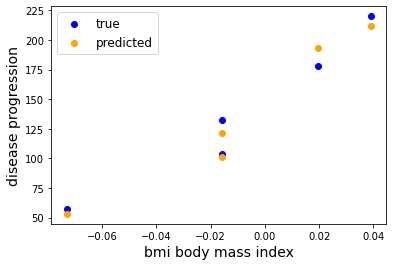

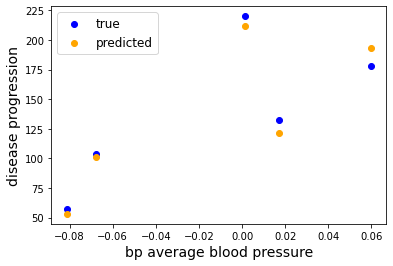

In [12]:
# plot target as function of bmi body mass index
X_plot = X_test[:, 2]
plt.scatter(X_plot, y_test,  color='blue', label="true")
plt.scatter(X_plot, y_pred, color='orange', label="predicted")
plt.xlabel("bmi body mass index", fontsize="14")
plt.ylabel("disease progression", fontsize="14")
plt.legend(fontsize="12")
plt.show()

# plot target as function of bp average blood pressure
X_plot = X_test[:, 3]
plt.scatter(X_plot, y_test,  color='blue', label="true")
plt.scatter(X_plot, y_pred, color='orange', label="predicted")
plt.xlabel("bp average blood pressure", fontsize="14")
plt.ylabel("disease progression", fontsize="14")
plt.legend(loc="upper left", fontsize="12")
plt.show()

Note that in the plots the test values as referred to as "true". It is common to refer to test values as such.

The map between features and targets is linear (affine). Even though the predicted points do not appear to be linear functions of individual features (see the average blood pressure plot) they in fact are.

---